### First thing to remember about OpenCV's `RGB` it that it's `BGR`

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [97]:
image = cv2.imread('./images/input.jpg')

In [98]:
# Let's look at the individual color levels for the first pixel (0, 0)
# BGR values for the first 0,0 pixel
B, G, R = image[0, 0]
print(B, G, R)
B, G, R = image[10, 50]
print(B, G, R)
print(image.shape)

12 18 31
12 19 34
(415, 622, 3)


Let's see what happens when we convert it to grayscale

In [99]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
print(gray_img[10, 50])


(415, 622)
23


It's now only 2 dimensions. Each pixel coordinate has only one value
(previously 3) with a range of 0 to 255

In [100]:
gray_img[0, 0]




21

### Another useful color space is HSV
- In fact HSV is very useful in color filtering.
- H: 0 - 180, S: 0 - 255, V: 0 - 255

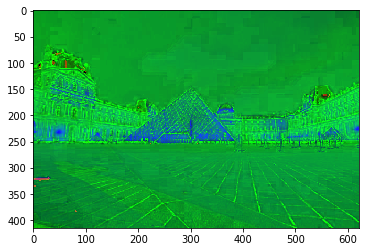

In [101]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2.imshow('HSV channel', hsv_image)
plt.imshow(hsv_image, cmap='hsv')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [102]:
from IPython.display import display, HTML
import cv2
import base64

def imshow(name, imageArray):
     # print(name) 
     _, png = cv2.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<p>{2}</p><img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii'), name))

img = cv2.imread('./images/input.jpg',cv2.IMREAD_COLOR)
imshow('RGB Image', img)

In [103]:
# print('HSV Image')
imshow('HSV image', hsv_image)

In [104]:
imshow('Hue channel', hsv_image[:, :, 0])

In [105]:
imshow('Saturation channel', hsv_image[:, :, 1])

In [106]:
imshow('Value channel', hsv_image[:, :, 2])

### Let's now explore looking at individual channels in an RGB image

In [107]:
image = cv2.imread('./images/input.jpg')

# OpenCV's split function splites the image into each color index
B, G, R = cv2.split(image)
print(B.shape)
imshow('Red', R)

(415, 622)


In [108]:
imshow('Green', G)

In [109]:
imshow('Blue', B)

In [110]:
# Let's re-make the original image
merged = cv2.merge([B, G, R])
imshow('Merged', merged)

In [111]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow('Merged with Blue Amplified', merged)

In [112]:
B, G, R = cv2.split(image)
# Let's create a matrix of zeros
# with dimensions of the image h x w

zeros = np.zeros(image.shape[:2], dtype='uint8')

In [113]:
imshow('Red', cv2.merge([zeros, zeros, R]))

In [114]:
imshow('Green', cv2.merge([zeros, G, zeros]))

In [115]:
imshow('Blue', cv2.merge([B, zeros, zeros]))

In [116]:
print(image.shape[:2])
 


(415, 622)
